# Housing - Machine Learning

## 0) Imports

Import das bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 0.1) Configurações

In [2]:
%matplotlib inline

RANDOM_STATE = 73

# 1) Carga do dataset

In [3]:
df = pd.read_csv('housing.csv')

## 1.1) Dicionário de Dados

| # | Coluna | Descrição |
|---:|:-------------|:-----------|
| 1 | longitude | Longitude do Distrito |
| 2 | latitude | Latitude do Distrito |
| 3 | housing_median_age | Idade Média da Casa no Distrito |
| 4 | total_rooms | Total de Cômodos no Distrito |
| 5 | total_bedrooms | Total de Dormitórios no Distrito |
| 6 | population | População no Distrito |
| 7 | households | Total de Agragados Familiares no Distrito |
| 8 | median_income | Renda Média no Distrito |
| 9 | median_house_value | Valor Médio da Casa no Distrito |
| 10 | ocean_proximity | Distância Até a Praia |


# 2) Análise Exploratória dos dados

# 2.1) Linhas iniciais do dataset

In [4]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 2.2) Estatísticas do dataset

### 2.2.1) Variáveis numéricas

In [5]:
display(df.shape)
display(df.info())

(20640, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


### 2.2.2) Variáveis categóricas

In [7]:
df['ocean_proximity'].value_counts(normalize = False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df['ocean_proximity'].value_counts(normalize = True) * 100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

### 2.2.3) Remoção de missing-values

Percebemos que a variável total_bedrooms apresenta 207 missing values, vamos dropar essas linhas

In [9]:
df.dropna(inplace = True)

## 2.3) Análises Gráficas

### 2.3.1) housing_median_age

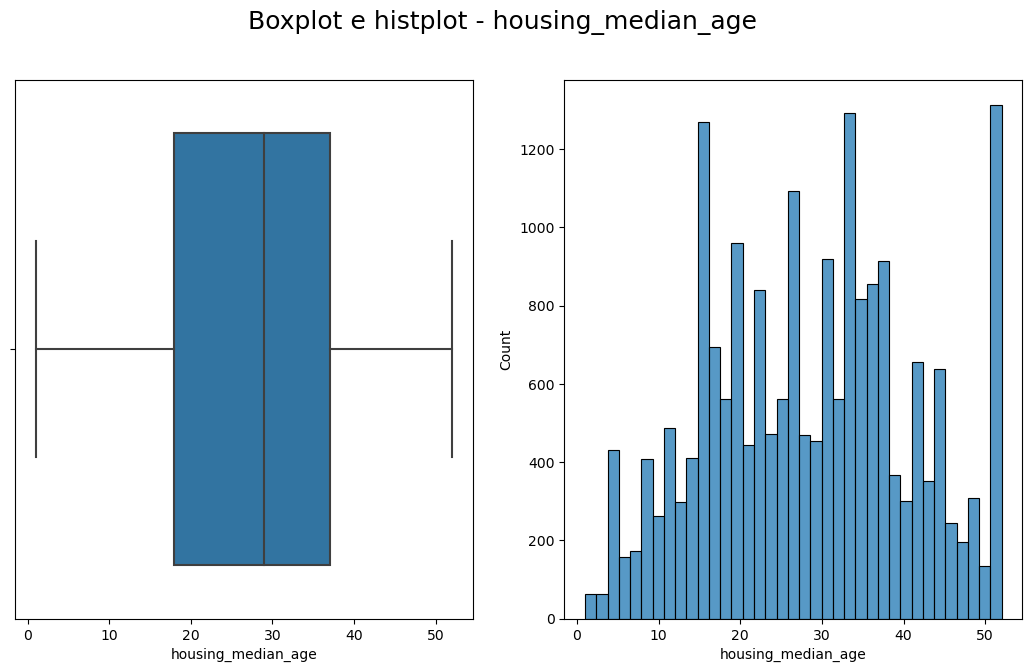

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - housing_median_age', fontsize = 18)

sns.boxplot(x = df['housing_median_age'], ax = ax1)
sns.histplot(x = df['housing_median_age'], ax = ax2)

plt.show()

### 2.3.2) total_rooms

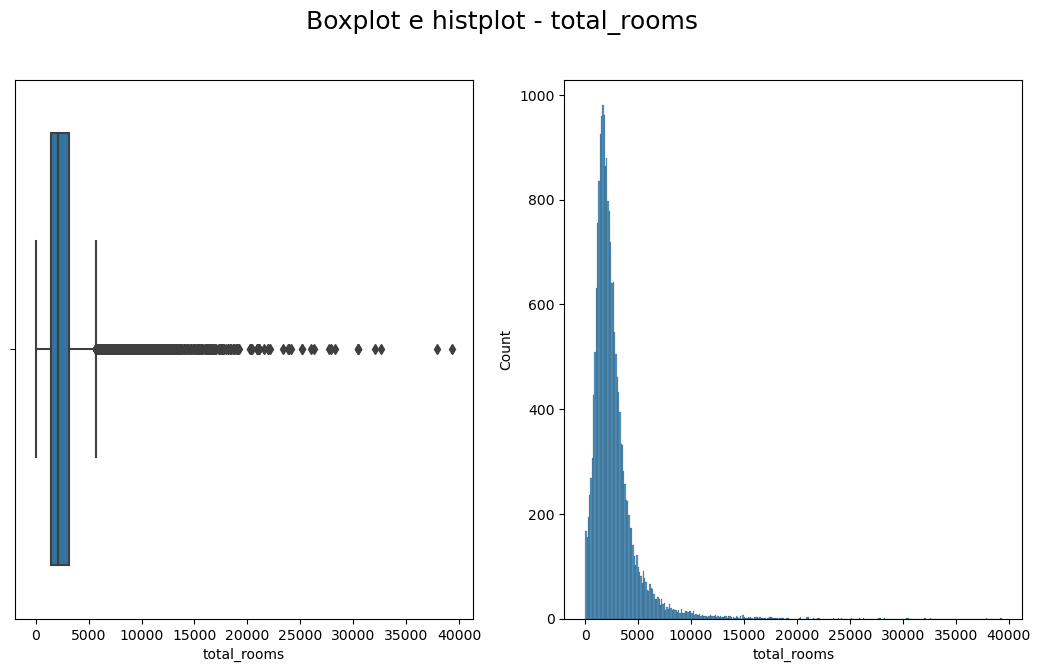

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - total_rooms', fontsize = 18)

sns.boxplot(x = df['total_rooms'], ax = ax1)
sns.histplot(x = df['total_rooms'], ax = ax2)

plt.show()

*Por conta da distribuição aparente nos gráficos acima, decidi traçar o grafico do log desta feature*

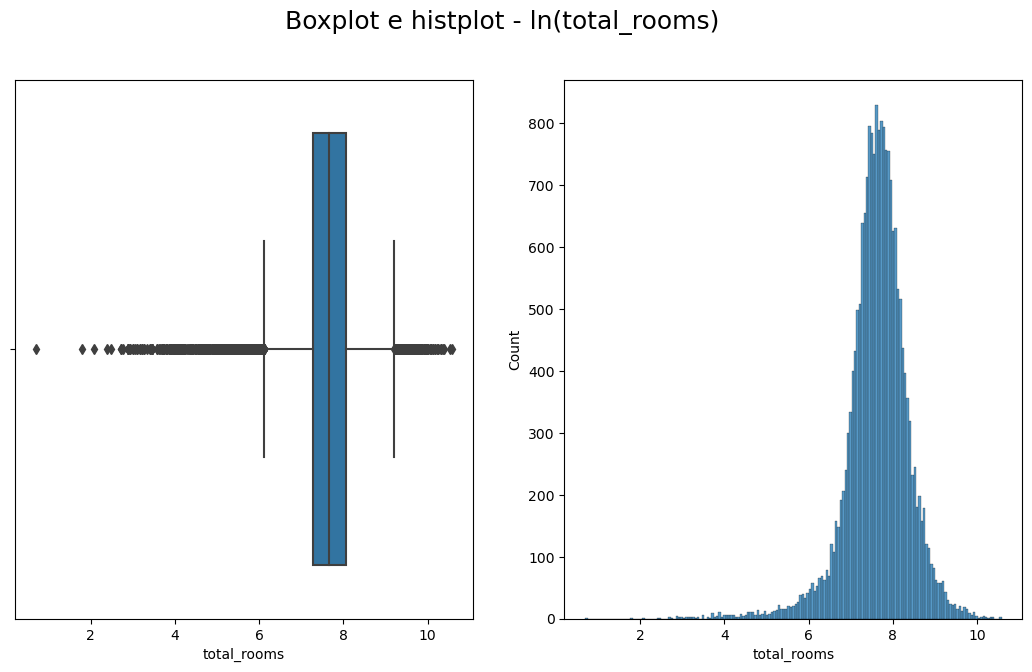

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - ln(total_rooms)', fontsize = 18)

sns.boxplot(x = np.log(df['total_rooms']), ax = ax1)
sns.histplot(x = np.log(df['total_rooms']), ax = ax2)

plt.show()

### 2.3.3) total_bedrooms

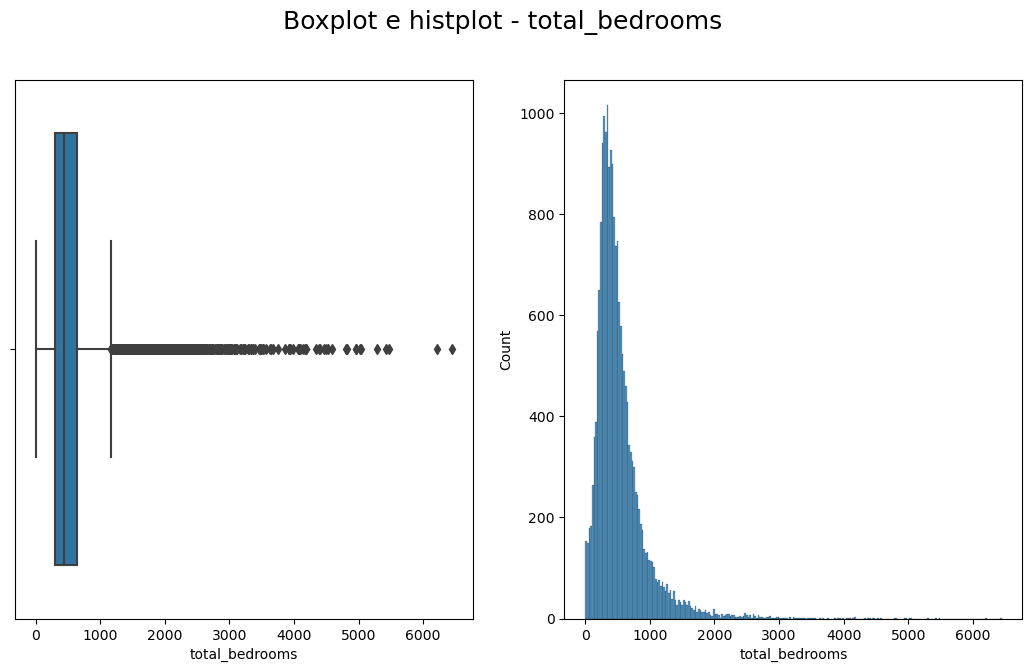

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - total_bedrooms', fontsize = 18)

sns.boxplot(x = df['total_bedrooms'], ax = ax1)
sns.histplot(x = df['total_bedrooms'], ax = ax2)

plt.show()

*Por conta da distribuição aparente nos gráficos acima, decidi traçar o grafico do log dessa coluna*

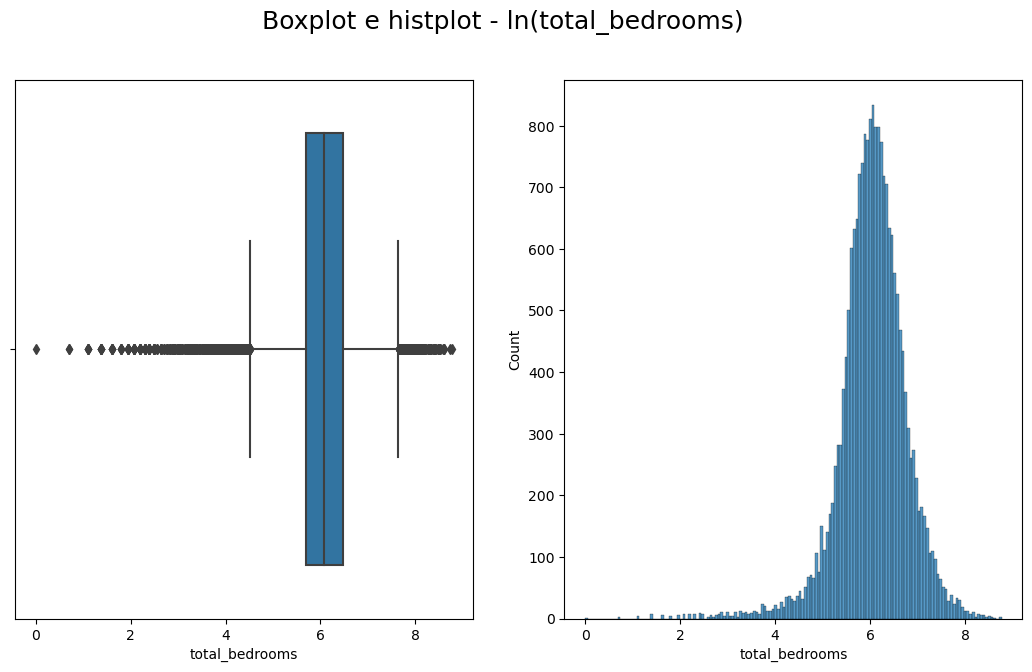

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - ln(total_bedrooms)', fontsize = 18)

sns.boxplot(x = np.log(df['total_bedrooms']), ax = ax1)
sns.histplot(x = np.log(df['total_bedrooms']), ax = ax2)

plt.show()

### 2.3.4) population

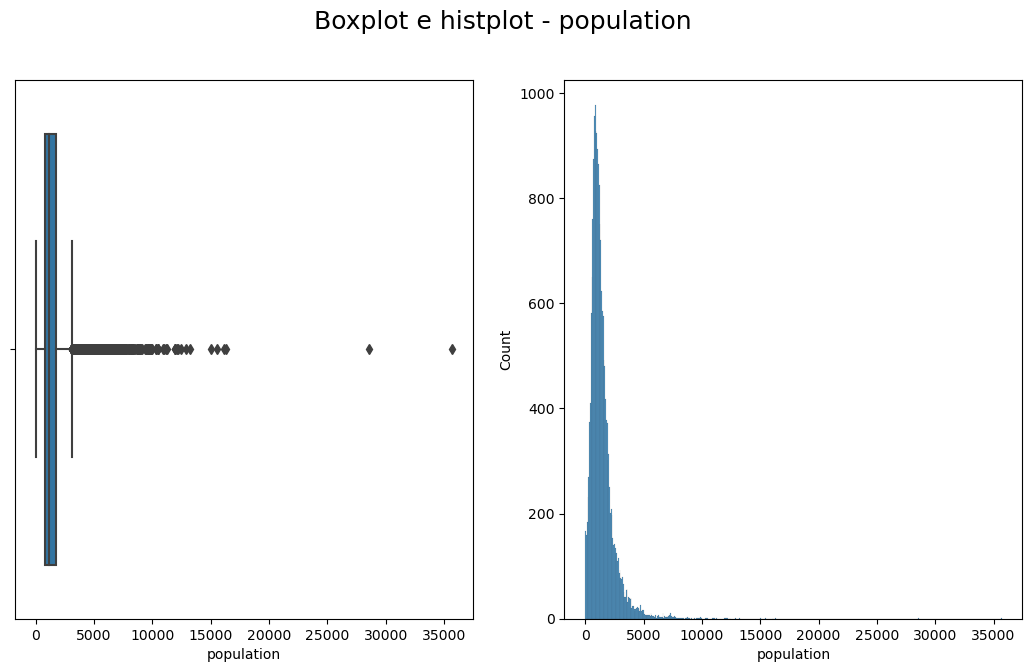

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - population', fontsize = 18)

sns.boxplot(x = df['population'], ax = ax1)
sns.histplot(x = df['population'], ax = ax2)

plt.show()

*Por conta da distribuição aparente nos gráficos acima, decidi traçar o grafico do log dessa coluna*

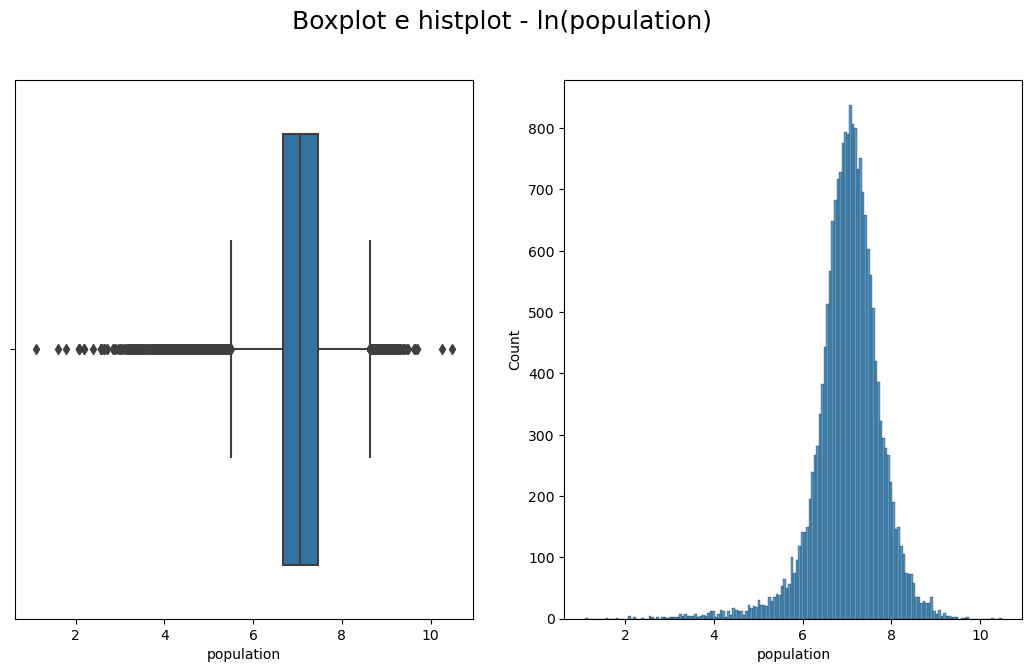

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - ln(population)', fontsize = 18)

sns.boxplot(x = np.log(df['population']), ax = ax1)
sns.histplot(x = np.log(df['population']), ax = ax2)

plt.show()

### 2.3.5) households

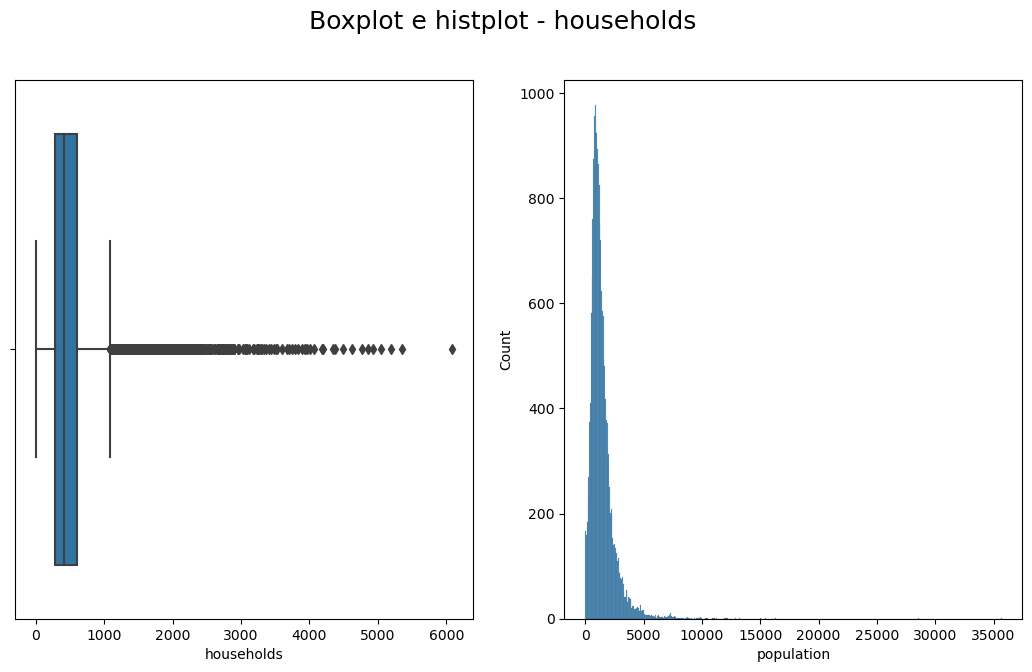

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - households', fontsize = 18)

sns.boxplot(x = df['households'], ax = ax1)
sns.histplot(x = df['population'], ax = ax2)

plt.show()

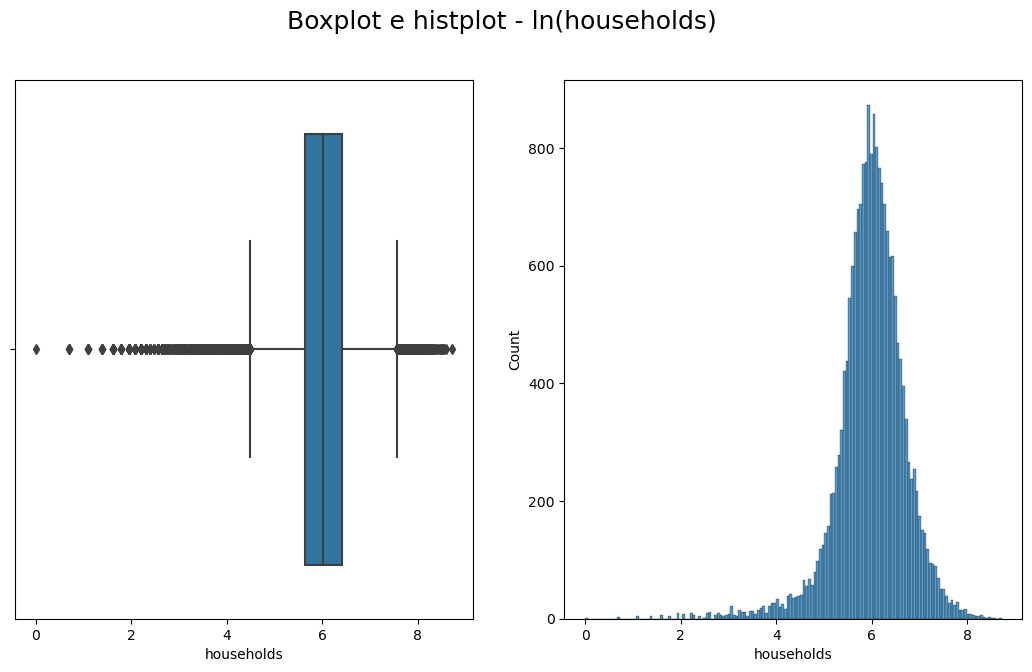

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - ln(households)', fontsize = 18)

sns.boxplot(x = np.log(df['households']), ax = ax1)
sns.histplot(x = np.log(df['households']), ax = ax2)

plt.show()

### 2.3.6) median_income

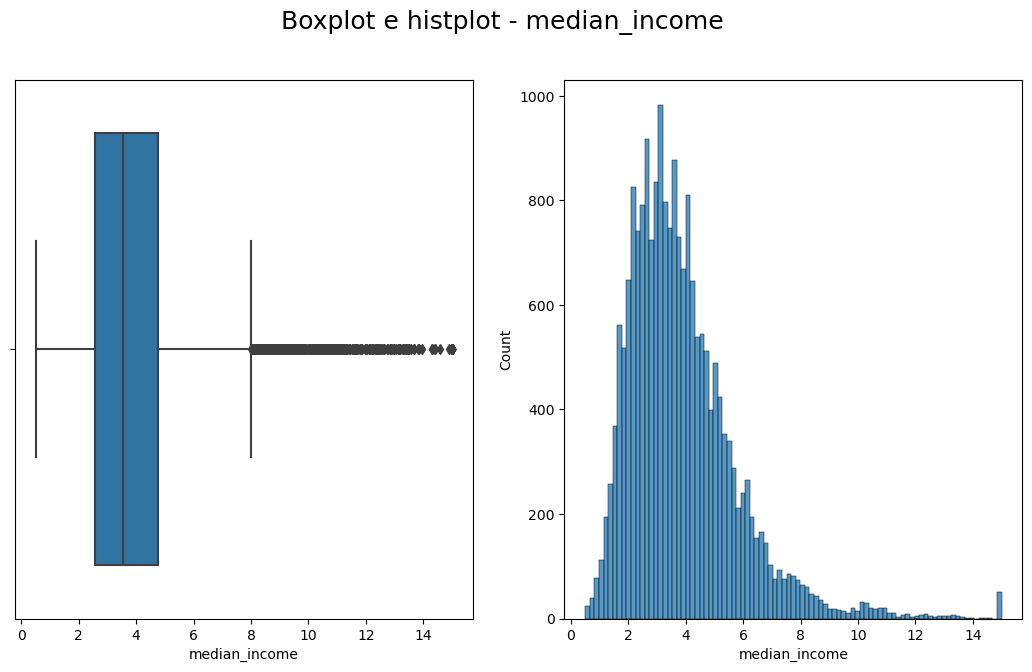

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - median_income', fontsize = 18)

sns.boxplot(x = df['median_income'], ax = ax1)
sns.histplot(x = df['median_income'], ax = ax2)

plt.show()

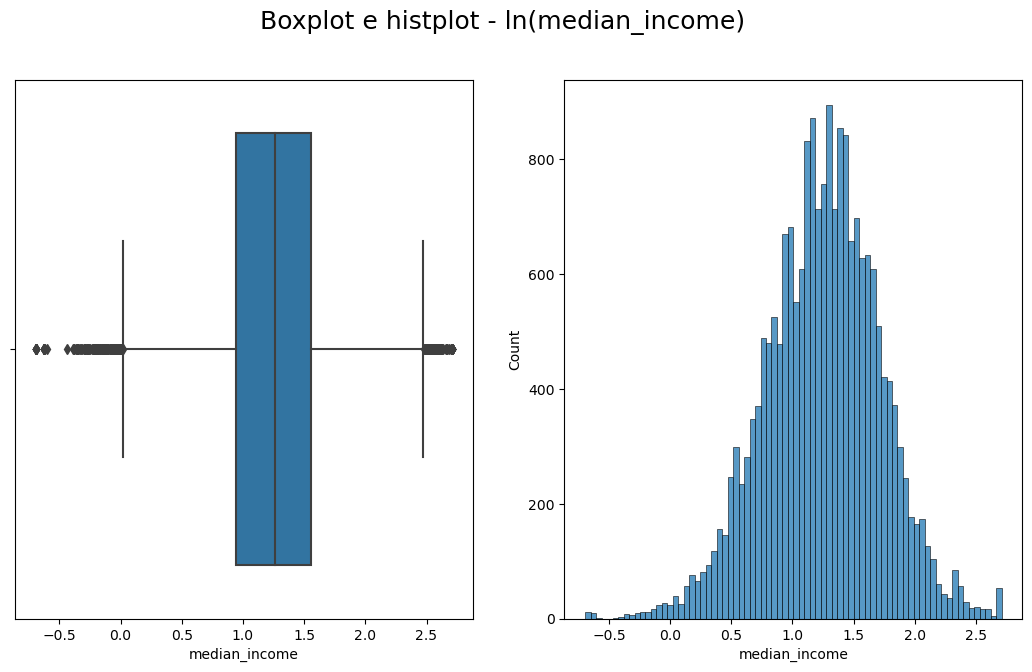

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - ln(median_income)', fontsize = 18)

sns.boxplot(x = np.log(df['median_income']), ax = ax1)
sns.histplot(x = np.log(df['median_income']), ax = ax2)

plt.show()

### 2.3.7) median_house_value

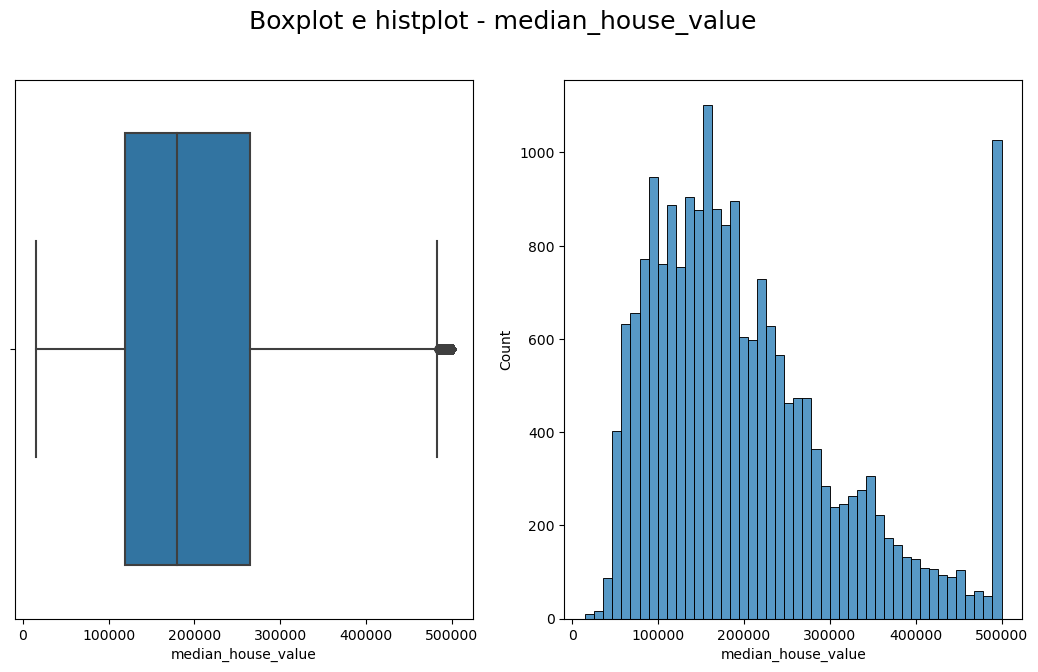

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - median_house_value', fontsize = 18)

sns.boxplot(x = df['median_house_value'], ax = ax1)
sns.histplot(x = df['median_house_value'], ax = ax2)

plt.show()

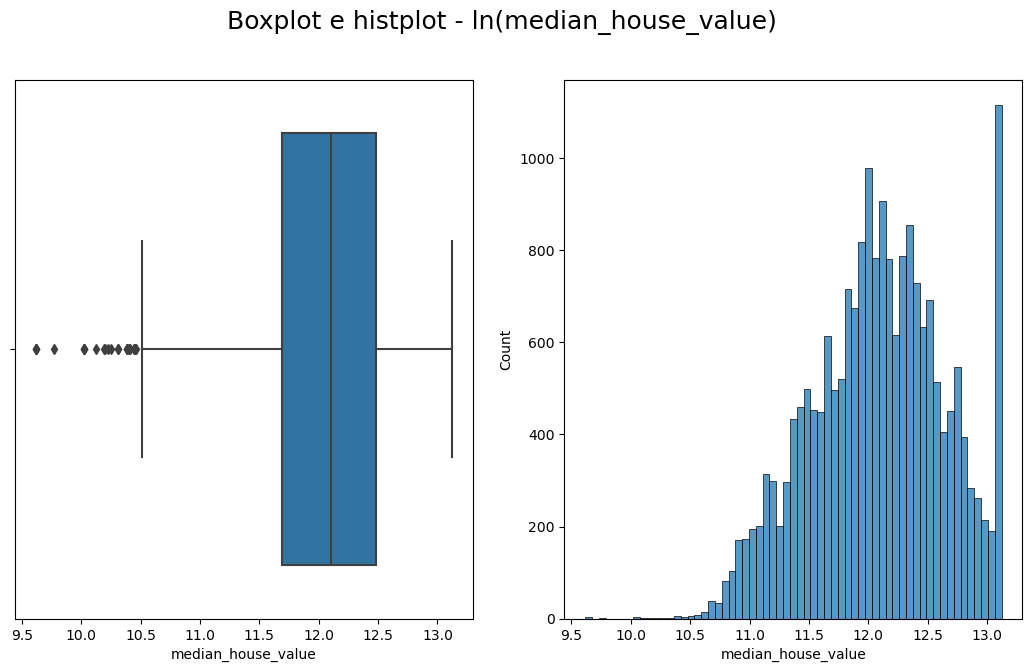

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot e histplot - ln(median_house_value)', fontsize = 18)

sns.boxplot(x = np.log(df['median_house_value']), ax = ax1)
sns.histplot(x = np.log(df['median_house_value']), ax = ax2)

plt.show()

### 2.3.8) Observações

Podemos verificar que as distribuições não são homogêneas entre si, nem obedecem uma distribuição normal, mas há um efeito ao interessante ao plotar aplicando a função $ln$ nas features.

## 2.4) Drop de features não interessantes para Regressão

Latitude e longitude são dados espaciais. Tiro essas informações para não enviezar o modelo. A informação que pode ser relevante neste caso, é a proximidade com o mar, e isto está retratado na feature ocean_proximity.

In [23]:
df.drop(['latitude', 'longitude'], axis = 'columns', inplace = True)

# 3) Clusterização

## 3.1) Transformar a variável categórica ocean_proximity em numérica usando get dummies

Ao criar dummies, aumentamos a dimensionalidade dos dados, então para não aumentar tanto, vamos tratar a variável, diminuindo de 5 para 3 categorias. Inicialmente a variável ocean_proximity tem 5 categorias distribuidas assim:

| Categoria  | Percentual |
|:-----------|:-----------|
| <1H OCEAN  | 44.26%  |
| INLAND     | 31.74%  |
| NEAR OCEAN | 12.88%  |
| NEAR BAY   | 11.09%  |
| ISLAND     | < 0.03%  |

Juntaremos as 3 últimas categorias, "NEAR OCEAN", "NEAR BAY" e "ISLAND" numa única categoria "OTHER" representando aproximadamente 24% dos distritos no dataset.

In [24]:
df2 = df.copy()
df2['ocean_proximity'] = df2['ocean_proximity'].apply(lambda x: 'OTHER' if (x == 'NEAR OCEAN' or x == 'NEAR BAY' or x == 'ISLAND') else x)
df2['ocean_proximity'].value_counts(normalize = True) * 100

<1H OCEAN    44.212793
INLAND       31.791709
OTHER        23.995497
Name: ocean_proximity, dtype: float64

Feito isso, criaremos as dummies a partir da feature ocean_proximity

In [25]:
df2 = pd.get_dummies(df2, columns=['ocean_proximity'], drop_first = True)

In [26]:
df2

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_OTHER
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,1
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,1
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,1
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,1
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,1
...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,0


# 3.2) Normalização dos valores das variáveis contínuas

In [27]:
scaler = StandardScaler()

df2[['housing_median_age', 'total_rooms',
      'total_bedrooms', 'population',
     'households', 'median_income']] = scaler.fit_transform(df2[['housing_median_age', 'total_rooms',
                                                                 'total_bedrooms', 'population',
                                                                 'households', 'median_income']])

## 3.3) Clusterização

### 3.3.1) k-means

In [28]:
kmeans = KMeans(n_clusters=3, random_state = RANDOM_STATE)
kmeans.fit(df2)
#kmeans.fit(df2.loc[:, df2.columns != 'median_house_value'])
df2['cluster'] = kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
df2

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_OTHER,cluster
0,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,452600.0,0,1,1
1,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,358500.0,0,1,1
2,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,352100.0,0,1,1
3,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,341300.0,0,1,1
4,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,342200.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
20635,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,78100.0,1,0,0
20636,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,77100.0,1,0,0
20637,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,92300.0,1,0,0
20638,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,84700.0,1,0,0


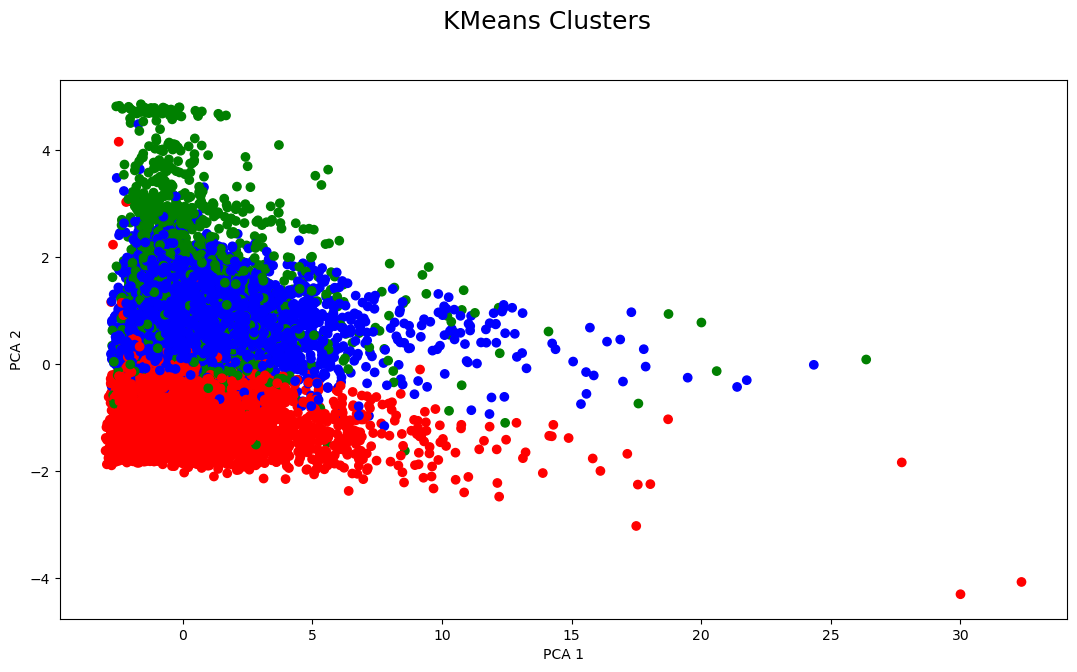

In [31]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df2.drop('median_house_value', axis=1))

colors = {0:'red', 1:'green', 2:'blue', 3: 'yellow', 4: 'black'}

fig, ax = plt.subplots(1, 1, figsize=(13, 7))

fig.suptitle('KMeans Clusters', fontsize = 18)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df2['cluster'].map(colors))

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

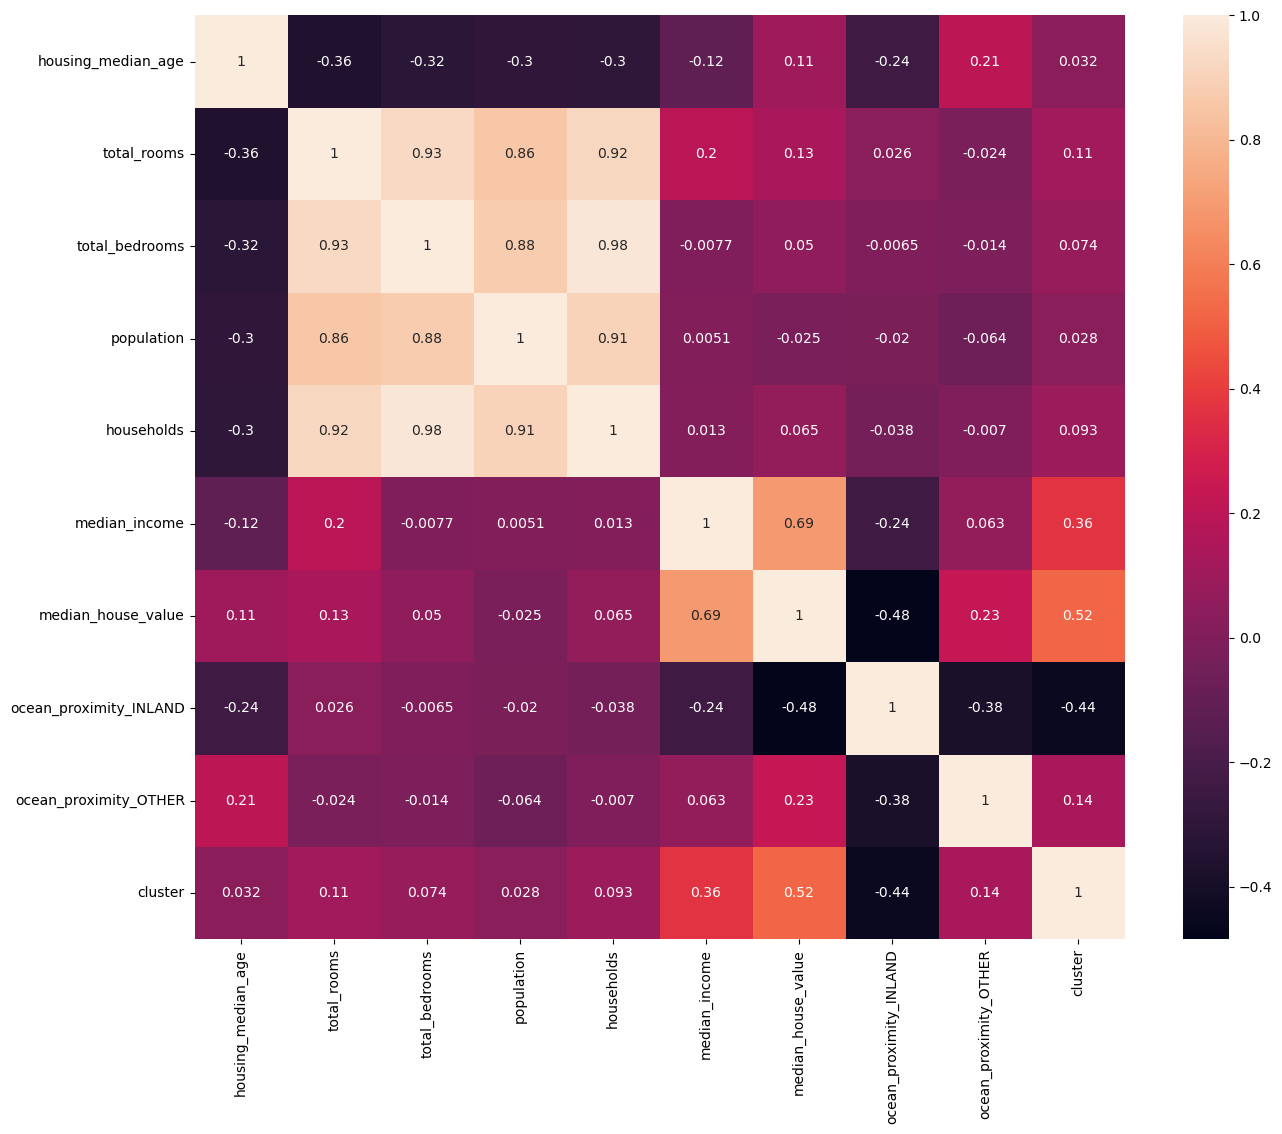

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()